# DATA EXPLORATION

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

# Loading the africa food prices dataset

In [2]:
missing_values = ["N/a","na",np.nan]
df = pd.read_csv("Python_project/africa_food_prices.csv", na_values=missing_values)

# Displaying the dataframe

In [3]:
df.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


# Viewing the structure of the dataframe

In [4]:
df.shape

(956779, 19)

# Displaying the info about the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

# Checking for na values 

In [6]:
print(df.isna().any())

Unnamed: 0            False
country_id            False
country               False
state_id              False
state                  True
market_id             False
market                False
produce_id            False
produce               False
currency_id           False
currency              False
pt_id                 False
market_type           False
um_unit_id            False
quantity              False
month                 False
year                  False
price                 False
mp_commoditysource     True
dtype: bool


# Removing irrelevant columns

In [7]:
df.drop(['Unnamed: 0','country_id','state_id','market_id',
         'produce_id','currency_id','um_unit_id','pt_id',
         'market_type','mp_commoditysource'], axis=1, inplace=True)

In [8]:
df

,country,state,market,produce,currency,quantity,month,year,price
0,Algeria,Alger,Algiers,Rice - Retail,DZD,KG,4,2015,90.0000
1,Algeria,Alger,Algiers,Rice - Retail,DZD,KG,5,2015,96.0000
2,Algeria,Alger,Algiers,Rice - Retail,DZD,KG,6,2015,96.0000
3,Algeria,Alger,Algiers,Rice - Retail,DZD,KG,7,2015,83.0000
4,Algeria,Alger,Algiers,Rice - Retail,DZD,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Midlands,Mbilashaba,Beans (sugar) - Retail,ZWL,KG,6,2021,233.3333
956775,Zimbabwe,Midlands,Mbilashaba,Toothpaste - Retail,ZWL,100 ML,6,2021,112.5000
956776,Zimbabwe,Midlands,Mbilashaba,Laundry soap - Retail,ZWL,KG,6,2021,114.0000
956777,Zimbabwe,Midlands,Mbilashaba,Handwash soap - Retail,ZWL,250 G,6,2021,59.5000


# Checking for na values

In [9]:
print(df.isna().any())

country     False
state        True
market      False
produce     False
currency    False
quantity    False
month       False
year        False
price       False
dtype: bool


# Checking for null values 

In [10]:

print(df.isnull().sum())

country          0
state       126678
market           0
produce          0
currency         0
quantity         0
month            0
year             0
price            0
dtype: int64


# Filling na values in state with their country values

In [11]:
df['state'].fillna(df['country'], inplace=True)

In [12]:
df['state'].isnull().sum()

0

In [13]:
print(df.isnull().sum())

country     0
state       0
market      0
produce     0
currency    0
quantity    0
month       0
year        0
price       0
dtype: int64


# Creating extra columns

In [14]:
df[['produce_name', 'produce_type']] = df['produce'].str.split(' - ', expand=True)

# Removing irrelevant columns

In [15]:
df.drop('produce', axis=1, inplace=True)

In [16]:
df

,country,state,market,currency,quantity,month,year,price,produce_name,produce_type
0,Algeria,Alger,Algiers,DZD,KG,4,2015,90.0000,Rice,Retail
1,Algeria,Alger,Algiers,DZD,KG,5,2015,96.0000,Rice,Retail
2,Algeria,Alger,Algiers,DZD,KG,6,2015,96.0000,Rice,Retail
3,Algeria,Alger,Algiers,DZD,KG,7,2015,83.0000,Rice,Retail
4,Algeria,Alger,Algiers,DZD,KG,8,2015,80.0000,Rice,Retail
...,...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Midlands,Mbilashaba,ZWL,KG,6,2021,233.3333,Beans (sugar),Retail
956775,Zimbabwe,Midlands,Mbilashaba,ZWL,100 ML,6,2021,112.5000,Toothpaste,Retail
956776,Zimbabwe,Midlands,Mbilashaba,ZWL,KG,6,2021,114.0000,Laundry soap,Retail
956777,Zimbabwe,Midlands,Mbilashaba,ZWL,250 G,6,2021,59.5000,Handwash soap,Retail


In [17]:
df.dtypes

country          object
state            object
market           object
currency         object
quantity         object
month             int64
year              int64
price           float64
produce_name     object
produce_type     object
dtype: object

# RESEARCH QUESTIONS

- What are the total market size
- What are the total number of countries involved
- What are the total number of currencies in use
- List all the countries and their currencies
- Show summary of Nigeria market
- What are the top 10 largest produce
- What are the least 10 produce

# Total market size 

In [18]:
np.size((df['market'].unique()))

1696

# Total number of countries involved

In [19]:
np.size((df['country'].unique()))

42

# Total number of currencies in use 

In [20]:
np.size((df['currency'].unique()))

34

# All currencies in use

In [21]:
df['currency'].unique()

array(['DZD', 'AOA', 'XOF', 'BIF', 'XAF', 'CVE', 'DJF', 'EGP', 'ERN',
       'ETB', 'GMD', 'GHS', 'GNF', 'KES', 'LSL', 'LRD', 'LYD', 'MGA',
       'MWK', 'MRO', 'MZN', 'NAD', 'NGN', 'RWF', 'SLL', 'SOS', 'ZAR',
       'SSP', 'SDG', 'SZL', 'UGX', 'ZMW', 'USD', 'ZWL'], dtype=object)

# Countries and their currencies

In [22]:
print(df[['country','currency']].value_counts(dropna=False))

country                   currency
Rwanda                    RWF         137746
Mali                      XOF          73843
Burundi                   BIF          60921
Gambia                    GMD          56971
Niger                     XOF          54974
Nigeria                   NGN          50285
Zambia                    ZMW          42793
Mozambique                MZN          42278
Libya                     LYD          41207
Benin                     XOF          39530
Senegal                   XOF          33563
Ghana                     GHS          25414
Ethiopia                  ETB          24627
Malawi                    MWK          22682
Cameroon                  XAF          22476
Guinea-Bissau             XOF          19796
Chad                      XAF          18896
Somalia                   SOS          18444
South Sudan               SSP          17746
Central African Republic  XAF          12720
Liberia                   LRD          12302
Guinea              

# Nigerian market summary

In [23]:
df[df['country'] == 'Nigeria'].value_counts()

country  state    market         currency  quantity  month  year  price      produce_name     produce_type
Nigeria  Abia     Aba            NGN       100 KG    3      2017  15920.000  Maize (white)    Wholesale       1
         Yobe     Bade (Gashua)  NGN       1.4 KG    9      2017  750.000    Rice (local)     Retail          1
                                                            2018  135.000    Millet           Retail          1
                                                                  350.000    Rice (local)     Retail          1
                                                                  450.000    Rice (imported)  Retail          1
                                                                                                             ..
         Gombe    Gombe          NGN       100 KG    9      2019  7375.000   Sorghum (white)  Wholesale       1
                                                                  8300.000   Maize (white)    Wholesale      

# Top 10 largest produce 

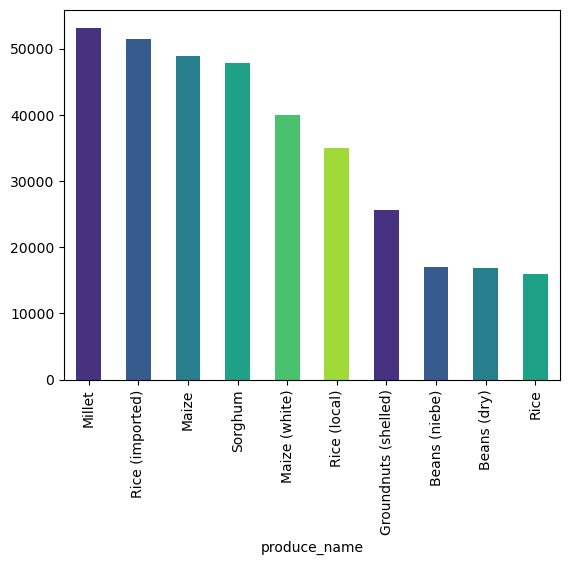

In [24]:
df['produce_name'].value_counts().nlargest(10).plot(kind='bar', color=sns.color_palette('viridis'))
plt.show()

# 10 smallest produce 

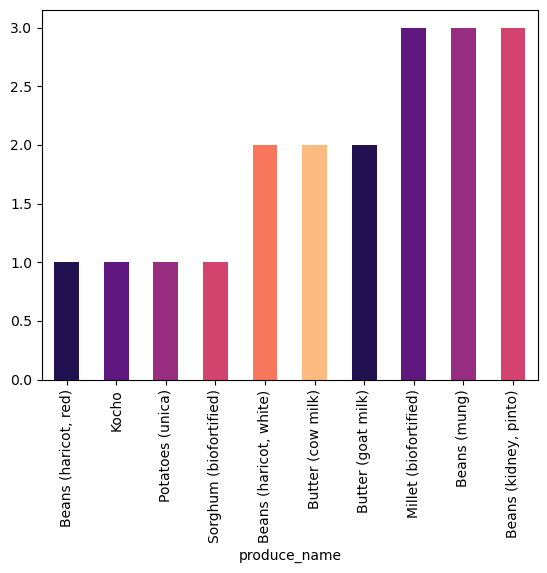

In [25]:
df['produce_name'].value_counts().nsmallest(10).plot(kind='bar', color=sns.color_palette('magma'))
plt.show()

# Count of the produce_type column

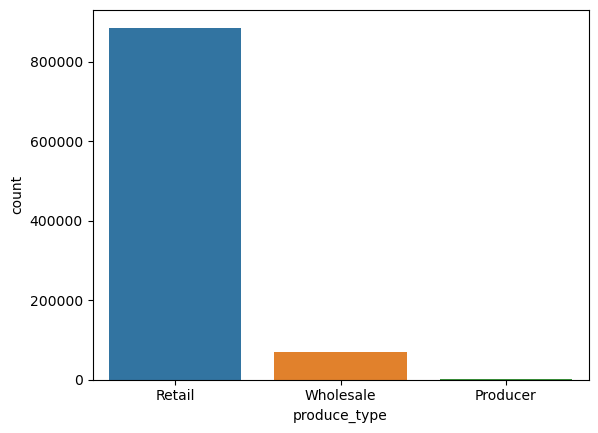

In [26]:
sns.countplot(data=df, x=df.produce_type)
plt.show()

# Checking statistical summary of data items by
* Country
* Currency
* Produce type

In [27]:
df_grp = df.groupby(['country', 'currency','produce_type'])

In [28]:
df_grp['price'].agg(['min', 'max', 'mean']).infer_objects()

min           max  \
country                  currency produce_type                            
Algeria                  DZD      Retail           4.0000  1.200000e+03   
Angola                   AOA      Retail          35.2000  1.428095e+04   
Benin                    XOF      Retail           3.0000  2.184359e+04   
                                  Wholesale       71.2500  4.530000e+02   
Burundi                  BIF      Retail           1.0000  7.360400e+04   
                                  Wholesale      293.6700  1.528853e+03   
Cameroon                 XAF      Retail          65.7200  3.000000e+04   
                                  Wholesale      400.0000  1.600000e+05   
Cape Verde               CVE      Retail          27.4100  3.466700e+02   
Central African Republic XAF      Retail           5.0000  1.035341e+04   
Chad                     XAF      Retail          15.0000  2.148330e+05   
Congo                    XAF      Retail         118.0000  1.380000e+04   
Djibouti                 DJF      Retail          22.5000  4.000000e+02   
                                  Wholesale     3400.0000  1.450000e+04   
Egypt                    EGP      Retail           0.6600  1.504600e+02   
Eritrea                  ERN      Retail         900.0000  5.000000e+03   
Ethiopia                 ETB      Retail           0.7680  4.800000e+04   
                                  Wholesale       43.2500  6.000000e+03   
Gabon                    XAF      Retail         303.0000  1.519000e+03   
Gambia                   GMD      Retail           0.0000  1.000000e+03   
Ghana                    GHS      Retail           0.3200  8.195000e+01   
                                  Wholesale        0.8700  2.960780e+03   
Guinea                   GNF      Retail         500.0000  9.000000e+04   
Guinea-Bissau            XOF      Retail           1.0350  9.464000e+03   
Kenya                    KES      Retail           5.0000  7.000000e+02   
                                  Wholesale       10.4270  1.035000e+04   
Lesotho                  LSL      Retail           5.0000  1.262400e+02   
Liberia                  LRD      Retail           5.0000  1.100000e+04   
Libya                    LYD      Retail           0.0100  3.339167e+02   
Madagascar               MGA      Producer       220.0000  1.103000e+03   
                                  Retail         400.0000  9.800000e+03   
Malawi                   MWK      Retail           6.4467  1.032578e+04   
Mali                     XOF      Retail          20.0000  4.745000e+05   
Mauritania               MRO      Retail           8.5000  3.000000e+05   
Mozambique               MZN      Retail           1.0000  1.000000e+03   
                                  Wholesale        1.0100  4.800000e+01   
Namibia                  NAD      Retail           0.7000  6.856990e+01   
Niger                    XOF      Retail          32.0000  2.187500e+03   
                                  Wholesale     9000.0000  5.500000e+04   
Nigeria                  NGN      Retail           5.0000  1.700000e+04   
                                  Wholesale       64.8369  9.000000e+04   
Rwanda                   RWF      Retail          11.0000  3.323333e+05   
                                  Wholesale       63.3770  8.807460e+02   
Senegal                  XOF      Retail          90.0000  1.200000e+03   
Sierra Leone             SLL      Retail         100.0000  1.666670e+05   
Somalia                  SOS      Retail          97.0000  1.725000e+07   
South Africa             ZAR      Wholesale        0.5023  5.757200e+00   
South Sudan              SSP      Retail           1.8000  2.600000e+05   
                                  Wholesale      287.5000  6.500000e+04   
Sudan                    SDG      Retail           0.4975  8.000000e+02   
                                  Wholesale        3.0000  2.500000e+04   
Swaziland                SZL      Retail           3.8440  1.142714e+02   
    